In [20]:
from pims import norpix_reader
seq = norpix_reader.NorpixSeq("seqs/bottom_jpeg.seq")


OSError: Only uncompressed images are supported in .seq files

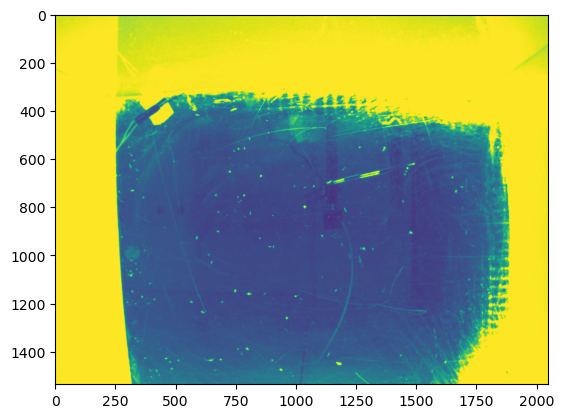

In [12]:
from matplotlib import pyplot
pyplot.imshow(seq[1])

In [2]:
from matplotlib import pyplot
from video import SeqBehaveVideo
seqfile = SeqBehaveVideo("seqs/bottom_jpeg.seq")
seqfile.header()

{'magic': 65261,
 'name': b'N\x00o\x00r\x00p\x00i\x00x\x00 \x00s\x00e\x00q\x00\x00\x00\x00\x00',
 'version': 5,
 'header_size': 1024,
 'description': b'S\x00t\x00r\x00e\x00a\x00m\x00P\x00i\x00x\x00 \x008\x00.\x003\x00.\x000\x00.\x000\x00 \x00(\x00x\x006\x004\x00)\x00\x00\x00<\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00hI?@\x01\x00\x00\x00\xb78\xd2\xfd\xfd\x7f\x00\x00\x9d\x8b6\xccP\x03\x00\x00\x00\x00\x00@\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11\x00\x00\x00\x00\x00\x00\x00\x1c\xf8\xd6\x91\x00\x00\x00\x00\x11\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 \x8c~\x1c\x00\x00\x00\x00L\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\\\x00\x00\x00\x00\x00\xbd6\xd1\xfd\xfd\x7f\x00\x00\x11\x01\x00\x00\x00\x00\x00\x00\x85\x03\xfe\x7f\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x008\xe2\x14\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 \x8c~\x1c\x00\x00\x00\x00\x99\x16b\xfb\xfd\x7f\x00\x00L\x00\x00\

In [1]:
seqfile = open("seqs/bottom_jpeg.seq",'rb')

In [2]:
image_offset = 8192
jpg_byte_start = b'\xff\xd8'
jpg_byte_end = b'\xff\xd9'

In [3]:
seqfile.seek(image_offset)
data = seqfile.read()

In [4]:
jpg_image = bytearray()
start = data.find(jpg_byte_start)
end = data.find(jpg_byte_end, start) + len(jpg_byte_end)
jpg_image += data[start:end+1]

In [6]:
import numpy as np
image = np.asarray(jpg_image, dtype="uint8")

In [7]:
import cv2
image = cv2.imdecode(image, 0)


True

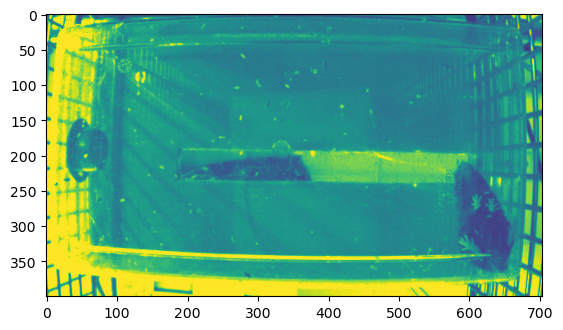

In [8]:
image = np.asarray(image)
from matplotlib import pyplot
pyplot.imshow(image)